In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
dataset = pd.read_csv('Malware dataset.csv')
dataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [35]:
# drop unique value cols
df = dataset.drop(
    columns = ['hash'],
    axis = 1
)

df.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [36]:
df.shape

(100000, 34)

In [37]:
df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [38]:
# check for null values
df.isnull().sum()

millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [39]:
df.columns

Index(['millisecond', 'classification', 'state', 'usage_counter', 'prio',
       'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count',
       'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users',
       'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm',
       'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nvcsw',
       'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'utime',
       'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   millisecond        100000 non-null  int64 
 1   classification     100000 non-null  object
 2   state              100000 non-null  int64 
 3   usage_counter      100000 non-null  int64 
 4   prio               100000 non-null  int64 
 5   static_prio        100000 non-null  int64 
 6   normal_prio        100000 non-null  int64 
 7   policy             100000 non-null  int64 
 8   vm_pgoff           100000 non-null  int64 
 9   vm_truncate_count  100000 non-null  int64 
 10  task_size          100000 non-null  int64 
 11  cached_hole_size   100000 non-null  int64 
 12  free_area_cache    100000 non-null  int64 
 13  mm_users           100000 non-null  int64 
 14  map_count          100000 non-null  int64 
 15  hiwater_rss        100000 non-null  int64 
 16  total_vm           10

In [41]:
# Encoding the 'classification' column.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['classification'] = encoder.fit_transform(df['classification'])

df.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [42]:
df['classification'].value_counts()

classification
1    50000
0    50000
Name: count, dtype: int64

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
correlation = df.corr()

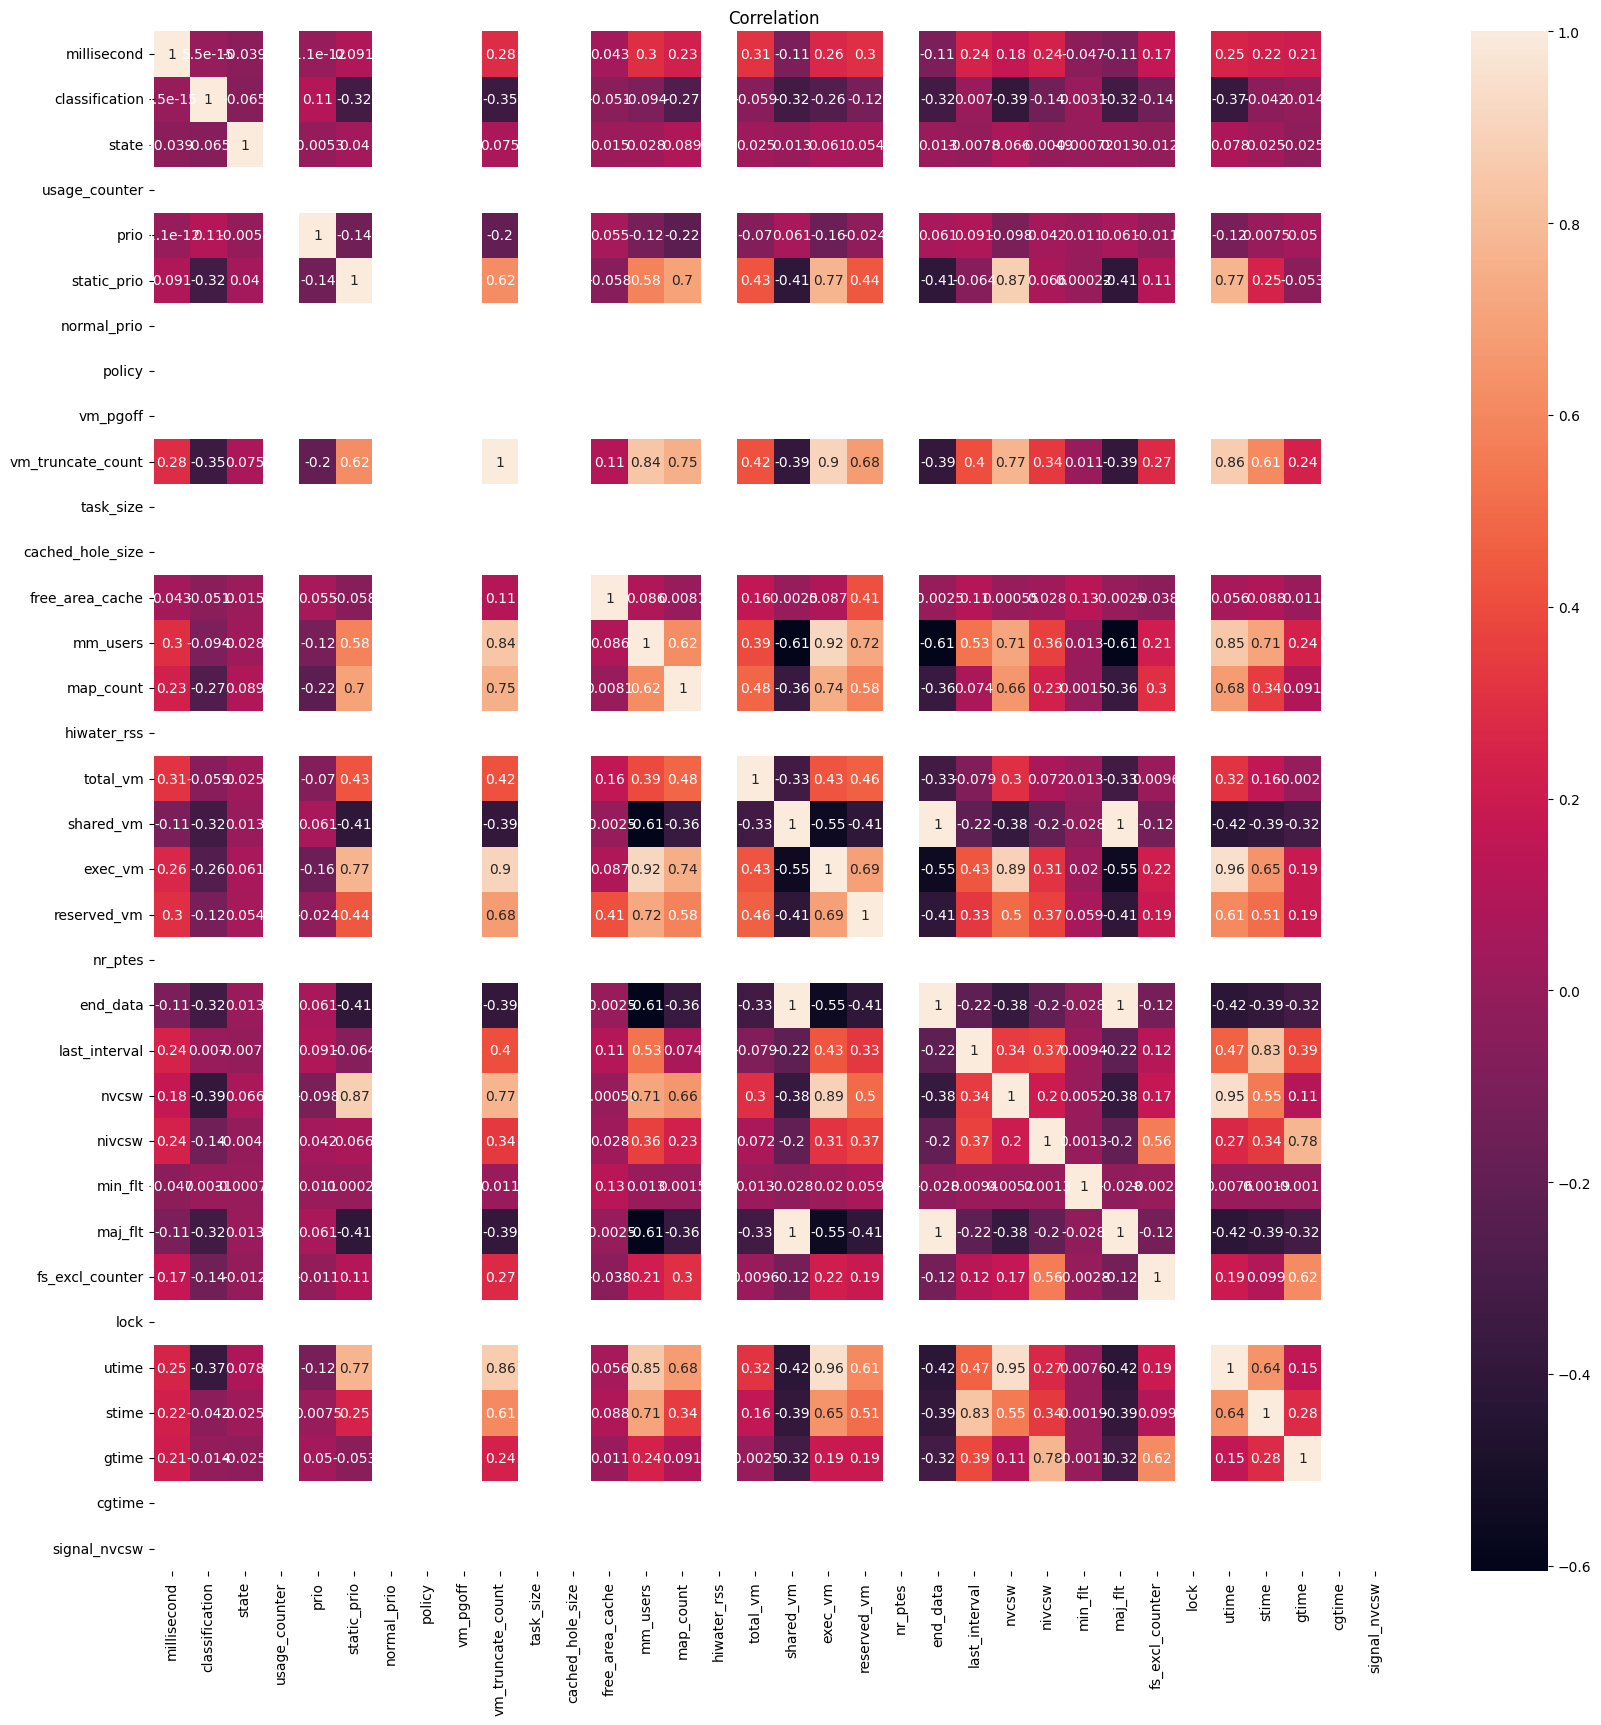

In [45]:
plt.figure(figsize = [20, 20])

sns.heatmap(
    correlation,
    annot = True
)

plt.title("Correlation")
plt.show()

In [46]:
# removing columns with no correlation
df_new = df.drop(
    columns = [
        'millisecond',
        'usage_counter', 
        'static_prio',
        'normal_prio',
        'policy',
        'vm_pgoff',
        'vm_truncate_count',
        'task_size',
        'cached_hole_size',
        'mm_users',
        'map_count',
        'hiwater_rss',
        'total_vm',
        'exec_vm',
        'reserved_vm',
        'nr_ptes',
        'last_interval',
        'nvcsw',
        'nivcsw',
        'min_flt',
        'maj_flt',
        'lock',
        'utime',
        'stime',
        'gtime',
        'cgtime',
        'signal_nvcsw'
    ],
    axis = 1
)

In [47]:
df_new.shape

(100000, 7)

In [48]:
correlation = df_new.corr()

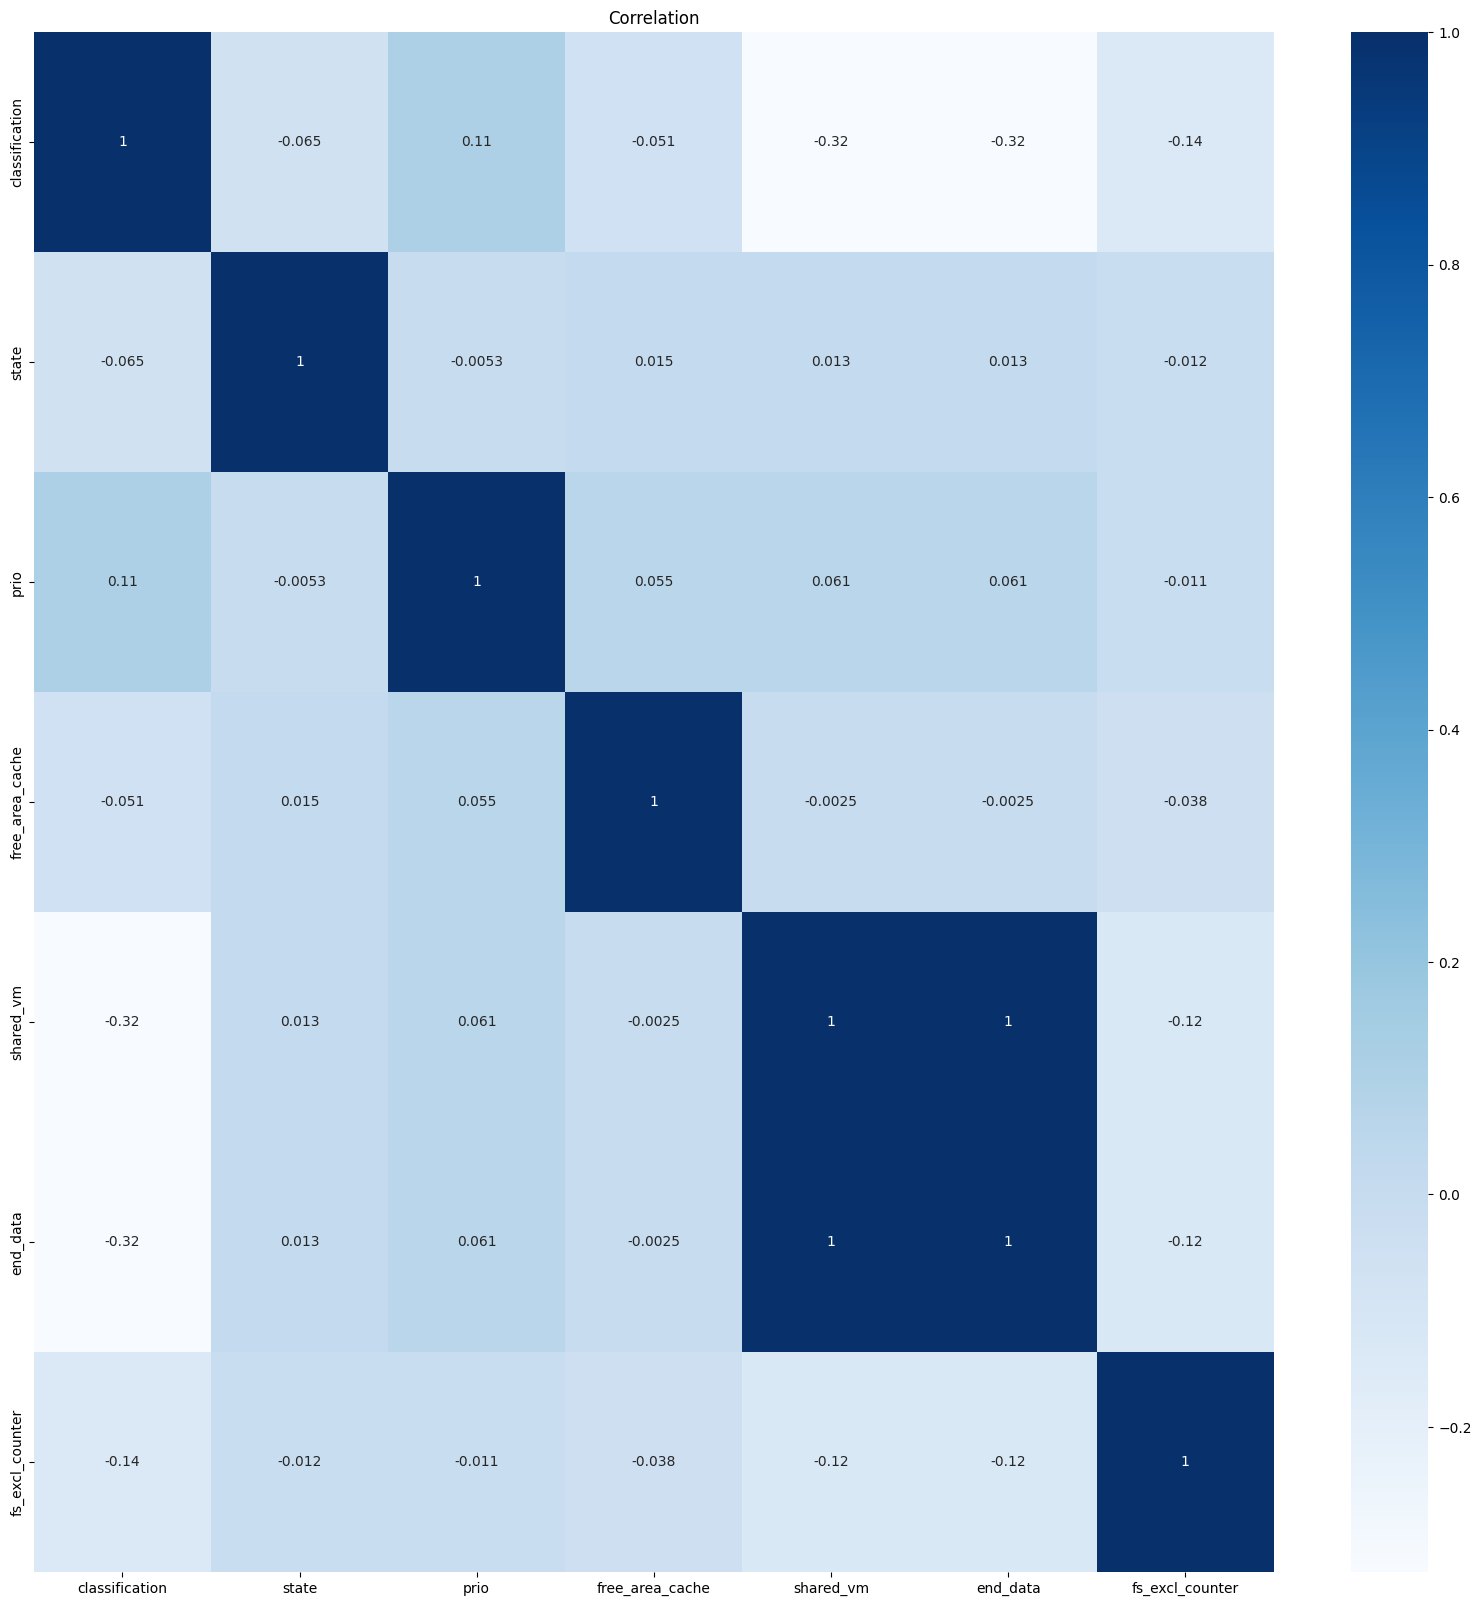

In [49]:
plt.figure(figsize = [20, 20])

sns.heatmap(
    correlation,
    annot = True,
    cmap = 'Blues'
)

plt.title("Correlation")
plt.show()

In [50]:
# Target column / Dependent Variable
y = df_new['classification']

# Independent columns
x = df_new.drop(
    columns = ['classification'],
    axis = 1
)
x.head()

,state,prio,free_area_cache,shared_vm,end_data,fs_excl_counter
0,0,3069378560,24,120,120,0
1,0,3069378560,24,120,120,0
2,0,3069378560,24,120,120,0
3,0,3069378560,24,120,120,0
4,0,3069378560,24,120,120,0


In [51]:
correlation['classification'].sort_values(ascending = False)

classification     1.000000
prio               0.110036
free_area_cache   -0.051237
state             -0.064702
fs_excl_counter   -0.137883
shared_vm         -0.324954
end_data          -0.324954
Name: classification, dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
x_scaled = pd.DataFrame(
    scaler.fit_transform(x),
    columns = x.columns
)
x_scaled.head()

,state,prio,free_area_cache,shared_vm,end_data,fs_excl_counter
0,0.0,0.18254,0.046602,1.0,1.0,0.0
1,0.0,0.18254,0.046602,1.0,1.0,0.0
2,0.0,0.18254,0.046602,1.0,1.0,0.0
3,0.0,0.18254,0.046602,1.0,1.0,0.0
4,0.0,0.18254,0.046602,1.0,1.0,0.0


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size = 0.25,
    random_state = 42
)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [56]:
knn_model = KNeighborsClassifier()

knn_model.fit(x_train, y_train)

knn_xtest_pred = knn_model.predict(x_test)
knn_xtrain_pred = knn_model.predict(x_train)

In [57]:
knn_xtest_accuracy = accuracy_score(y_test, knn_xtest_pred)
knn_xtrain_accuracy = accuracy_score(y_train, knn_xtrain_pred)

print(f"X test Accuracy = {knn_xtest_accuracy * 100} %")
print(f"X train Accuracy = {knn_xtrain_accuracy * 100} %")

X test Accuracy = 99.67200000000001 %
X train Accuracy = 99.65066666666667 %


              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     12493
     Malware       0.99      1.00      1.00     12507

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Feature: 0, Score: 0.01666
Feature: 1, Score: 0.38264
Feature: 2, Score: 0.05917
Feature: 3, Score: 0.06355
Feature: 4, Score: 0.06355
Feature: 5, Score: 0.19820


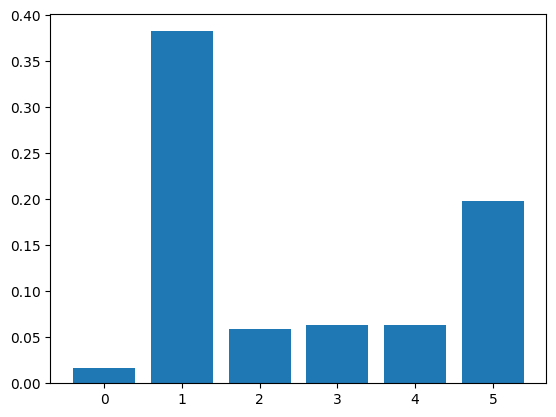

In [58]:
print(classification_report(y_test, knn_xtest_pred, target_names=['Benign', 'Malware']))

results = permutation_importance(knn_model, x_test, y_test, scoring='accuracy')

# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [59]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
cm = confusion_matrix(y_test, knn_xtest_pred)

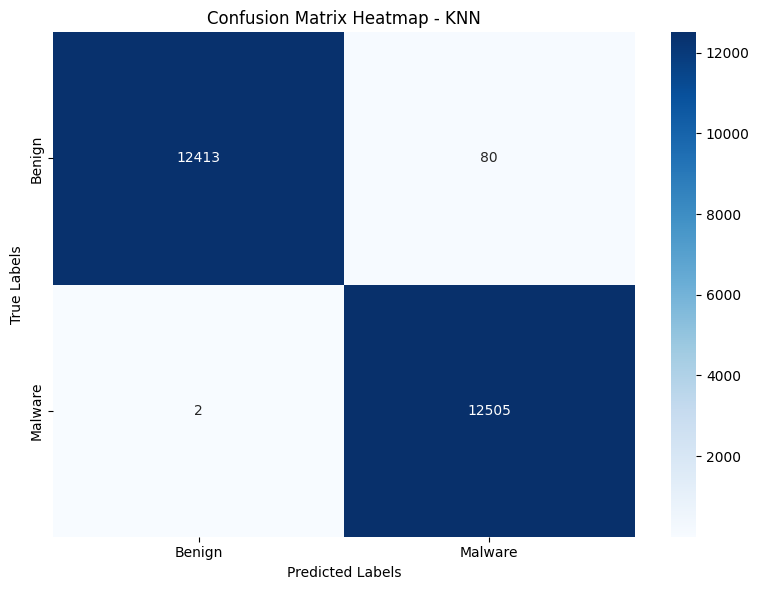

In [61]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=['Benign', 'Malware'],  
    yticklabels=['Benign', 'Malware']   
)
plt.title("Confusion Matrix Heatmap - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

# Additional metrics
accuracy = accuracy_score(y_test, knn_xtest_pred)
precision = precision_score(y_test, knn_xtest_pred)
recall = recall_score(y_test, knn_xtest_pred)
f1 = f1_score(y_test, knn_xtest_pred)
mcc = matthews_corrcoef(y_test, knn_xtest_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 1.00
Matthews Correlation Coefficient (MCC): 0.99


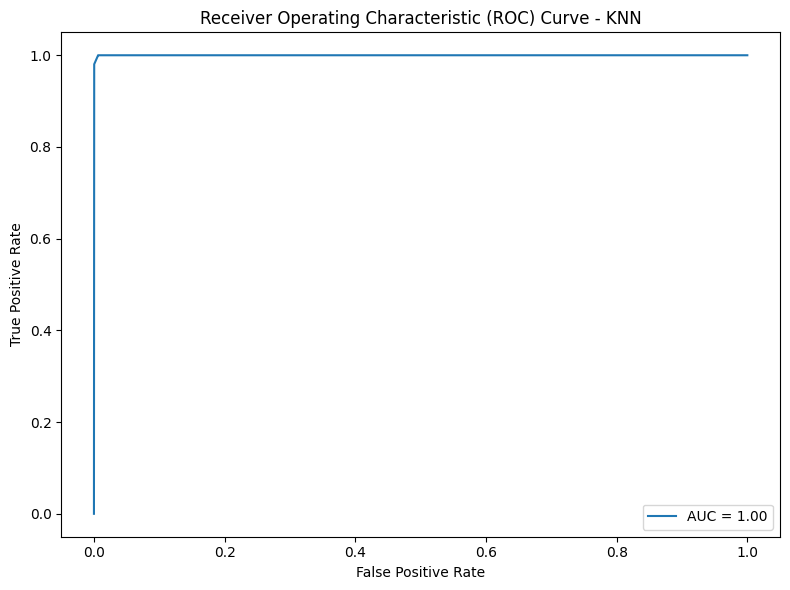

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve and AUC
y_pred_proba = knn_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - KNN")
plt.legend(loc=4)
plt.tight_layout()
plt.show()